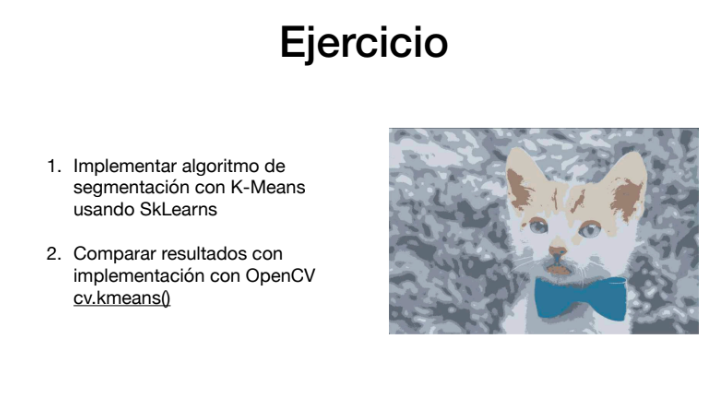

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2 as cv

In [ ]:
image = '/content/vistas-aéreas-la-cima-de-una-hermosa-playa-tropical-con-palmeras-coco-arena-blanca-y-mar-vista-superior-vacía-limpia-oleaje-231220132.webp'

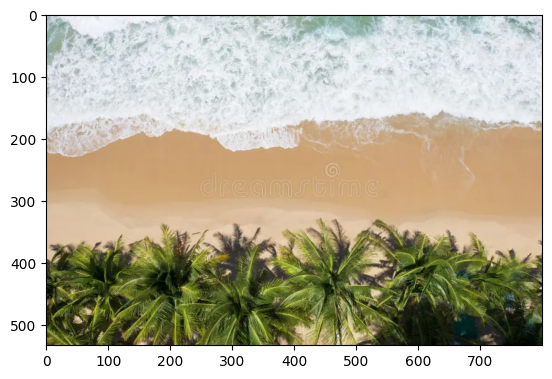

In [ ]:
imagen= Image.open(image)

plt.imshow(imagen)

In [ ]:
img_array = np.array(imagen)
pixels = img_array.reshape(-1, 3)
num_clusters = 5

In [ ]:

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pixels)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Reconvertir las etiquetas de los clusters a la imagen
segmented_img_array = centers[labels].reshape(img_array.shape).astype(np.uint8)

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = img.reshape((-1,3)) # numpy reshape operation -1 unspecified

# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

In [ ]:
#criterios
criterios = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Choosing number of cluster
k = 5

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criterios, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)

segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img.shape))





(-0.5, 799.5, 532.5, -0.5)

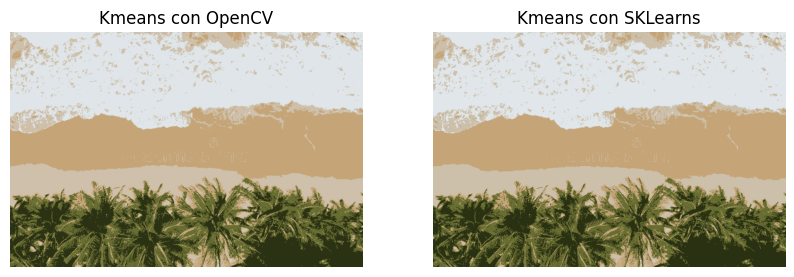

In [ ]:
# Mostrar la imagen original y la imagen segmentada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.title('Kmeans con SKLearns')
plt.imshow(segmented_img_array)
plt.axis('off')

plt.subplot(1, 2, 1)
plt.title('Kmeans con OpenCV')
plt.imshow(segmented_image)
plt.axis('off')